In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
#remove some false positives on assignments, turns down two warnings with column assignment, ln 5 (last line) and 8
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv("df23fin.csv")

<h3> Clustering for Dublin City </h3>

In [3]:
#only Dublin subset
dub = df[(df["Latitude"] >= 53.2595) & (df["Latitude"] <= 53.4135) &
                 (df["Longitude"] >= -6.40) & (df["Longitude"] <= -6.04)]

In [4]:
#select only numerical columns for clustering
dub_clust = dub[["Latitude", "Longitude", "Price"]]

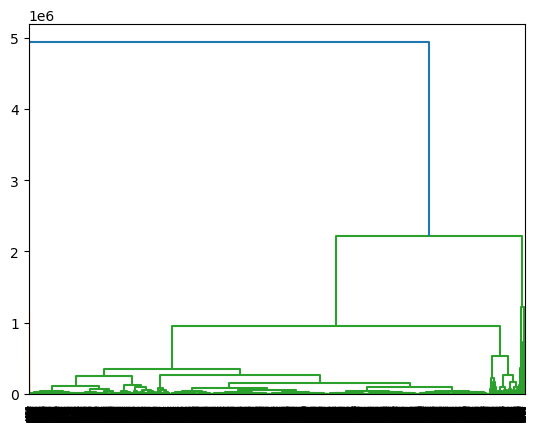

In [5]:
clustering = linkage(dub_clust, method="average", metric="euclidean")
dendrogram(clustering)
cluster_labels = cut_tree(clustering, n_clusters=15).reshape(-1, )
dub_clust["Cluster"] = cluster_labels

<Axes: xlabel='Cluster', ylabel='Price'>

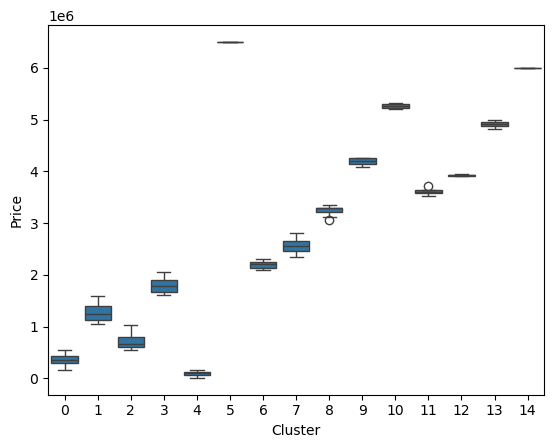

In [6]:
sns.boxplot(x="Cluster", y="Price", data=dub_clust)

In [7]:
#select only last character from the address
addr = dub["Address"].str[-9:]
#leave the ones that were legible/without big gaps
topx = addr.value_counts().index[:19]
#chain to remove small subsets of data, process anything that's left over
addr = (addr
        .where(addr.isin(topx), other="Other")
        .str.replace(r'^d, Dalkey$', 'Dalkey', regex=True)
        .replace("DUBLIN 6W", "Other")
)

print(addr.value_counts())

Address
Other        2094
 DUBLIN 9     284
 DUBLIN 8     281
DUBLIN 12     263
 DUBLIN 7     262
 DUBLIN 4     232
DUBLIN 15     226
DUBLIN 14     217
 DUBLIN 5     213
 DUBLIN 6     212
DUBLIN 11     208
 DUBLIN 3     204
DUBLIN 16     174
DUBLIN 24     165
DUBLIN 13     152
 DUBLIN 1     118
DUBLIN 18     117
Dalkey        102
 DUBLIN 2      84
Name: count, dtype: int64


In [8]:
dub["Locality"] = addr
dub["Cluster"] = dub_clust["Cluster"]

In [10]:
dub

,Address,County,Full,Date,Full Market Price,VAT exclusive,Latitude,Longitude,Price,Locality,Cluster
6,"89 CHARLEVILLE CLOSE, RATHMINES, DUBLIN 6",Dublin,"89 CHARLEVILLE CLOSE, RATHMINES, DUBLIN 6, Dublin",2023-01-01,1,0,53.323167,-6.268411,310000.0,DUBLIN 6,0
11,"75 DONNYBROOK CASTLE, DONNYBROOK, DUBLIN 4",Dublin,"75 DONNYBROOK CASTLE, DONNYBROOK, DUBLIN 4, Du...",2023-01-03,1,0,53.316852,-6.231050,475000.0,DUBLIN 4,0
12,"7 GLENPARK DR, WOODFARM COURT, PALMERSTOWN DUB...",Dublin,"7 GLENPARK DR, WOODFARM COURT, PALMERSTOWN DUB...",2023-01-03,1,0,53.355877,-6.381898,410000.0,Other,0
13,"7 ST ASSAMS DR, RAHENY, DUBLIN 5",Dublin,"7 ST ASSAMS DR, RAHENY, DUBLIN 5, Dublin",2023-01-03,1,0,53.381349,-6.167567,525000.0,DUBLIN 5,0
16,"73 SANDFORD ROAD, RANELAGH, DUBLIN 6",Dublin,"73 SANDFORD ROAD, RANELAGH, DUBLIN 6, Dublin",2023-01-03,1,0,53.320333,-6.245013,1063000.0,DUBLIN 6,1
...,...,...,...,...,...,...,...,...,...,...,...
26676,"21 FERNCARRIG AVE, FERNLEIGH, SANDYFORD DUBLIN 12",Dublin,"21 FERNCARRIG AVE, FERNLEIGH, SANDYFORD DUBLIN...",2023-06-30,1,0,53.265640,-6.218632,560000.0,DUBLIN 12,2
26677,"21 GLENVILLE WAY, CLONSILLA, DUBLIN 15",Dublin,"21 GLENVILLE WAY, CLONSILLA, DUBLIN 15, Dublin",2023-06-30,1,0,53.382847,-6.384192,510000.0,DUBLIN 15,0
26679,"183 A EDGEWORTH LAWN, CORDUFF, BLANCHARDSTOWN",Dublin,"183 A EDGEWORTH LAWN, CORDUFF, BLANCHARDSTOWN,...",2023-06-30,1,0,53.384208,-6.375974,265000.0,Other,0
26681,"22 THE TELFORD BUILDING, HEUSTON SOUTH QUARTER...",Dublin,"22 THE TELFORD BUILDING, HEUSTON SOUTH QUARTER...",2023-06-30,1,0,53.344386,-6.297570,460000.0,DUBLIN 8,0


In [13]:
#output for what clusters are associated with which localities
cluster_dict = dub.groupby("Cluster")["Locality"].unique().to_dict()
for cluster, d_list in cluster_dict.items():
    print(f"Cluster {cluster} is in: {', '.join(d_list)}")

Cluster 0 is in:  DUBLIN 6,  DUBLIN 4, Other,  DUBLIN 5,  DUBLIN 8,  DUBLIN 9,  DUBLIN 7,  DUBLIN 1, DUBLIN 11, DUBLIN 16, DUBLIN 12, DUBLIN 14, DUBLIN 24,  DUBLIN 2, DUBLIN 15, DUBLIN 13, DUBLIN 18,  DUBLIN 3, Dalkey
Cluster 1 is in:  DUBLIN 6, Other, DUBLIN 15,  DUBLIN 3,  DUBLIN 2,  DUBLIN 4, DUBLIN 14, DUBLIN 16,  DUBLIN 8, DUBLIN 13, DUBLIN 18,  DUBLIN 7,  DUBLIN 9, Dalkey
Cluster 2 is in:  DUBLIN 6, DUBLIN 15, Other,  DUBLIN 3, DUBLIN 14, DUBLIN 16,  DUBLIN 4,  DUBLIN 8,  DUBLIN 2, DUBLIN 13,  DUBLIN 5,  DUBLIN 7, DUBLIN 18, DUBLIN 12,  DUBLIN 9, DUBLIN 24, DUBLIN 11,  DUBLIN 1, Dalkey
Cluster 3 is in: Other,  DUBLIN 4, DUBLIN 14, DUBLIN 13,  DUBLIN 6,  DUBLIN 7,  DUBLIN 3, DUBLIN 18, DUBLIN 15,  DUBLIN 8,  DUBLIN 9,  DUBLIN 1
Cluster 4 is in: Other,  DUBLIN 4,  DUBLIN 7, DUBLIN 12, DUBLIN 11,  DUBLIN 6, DUBLIN 13,  DUBLIN 9,  DUBLIN 3,  DUBLIN 1, DUBLIN 16, DUBLIN 14, DUBLIN 24,  DUBLIN 5,  DUBLIN 2, DUBLIN 15
Cluster 5 is in: Other
Cluster 6 is in: Other,  DUBLIN 6,  DUBLIN 4, 

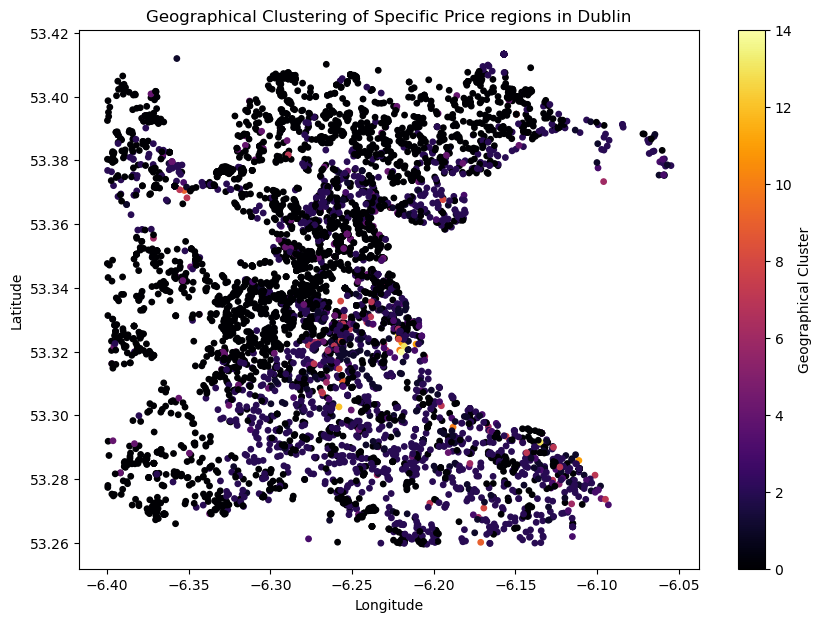

In [9]:
#only Dublin
plt.figure(figsize=(10, 7))
plt.scatter(dub_clust["Longitude"], dub_clust["Latitude"], c=dub_clust["Cluster"], cmap="inferno", s=15)
plt.colorbar().set_label("Geographical Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Clustering of Specific Price regions in Dublin")
plt.grid(False)
plt.show()

<h3>Nationwide Clustering</h3>

In [14]:
df.head()

,Address,County,Full,Date,Full Market Price,VAT exclusive,Latitude,Longitude,Price
0,"15 ST JOHNS TERRACE, OLD YOUGHAL RD, CORK CITY",Cork,"15 ST JOHNS TERRACE, OLD YOUGHAL RD, CORK CITY...",2023-01-01,1,0,51.911373,-8.442231,160000.0
1,"2 KINGS TERRACE, CORK CITY, CORK",Cork,"2 KINGS TERRACE, CORK CITY, CORK, Cork",2023-01-01,1,0,51.901490,-8.463452,180000.0
2,"22 COVE ST, CORK CITY, CORK",Cork,"22 COVE ST, CORK CITY, CORK, Cork",2023-01-01,1,0,51.895019,-8.475927,120000.0
3,"3 PARK HILL, SKEHARD RD, CORK",Cork,"3 PARK HILL, SKEHARD RD, CORK, Cork",2023-01-01,1,0,51.886775,-8.427577,320000.0
4,"4 SULLIVANS LANE, BARRACK ST, CORK",Cork,"4 SULLIVANS LANE, BARRACK ST, CORK, Cork",2023-01-01,1,0,51.892899,-8.478891,80000.0


In [15]:
df = df[["County", "Latitude", "Longitude", "Price"]]

In [16]:
df.head()

,County,Latitude,Longitude,Price
0,Cork,51.911373,-8.442231,160000.0
1,Cork,51.901490,-8.463452,180000.0
2,Cork,51.895019,-8.475927,120000.0
3,Cork,51.886775,-8.427577,320000.0
4,Cork,51.892899,-8.478891,80000.0


In [19]:
#select only the numerical subset
df_clust = df[["Latitude", "Longitude", "Price"]]

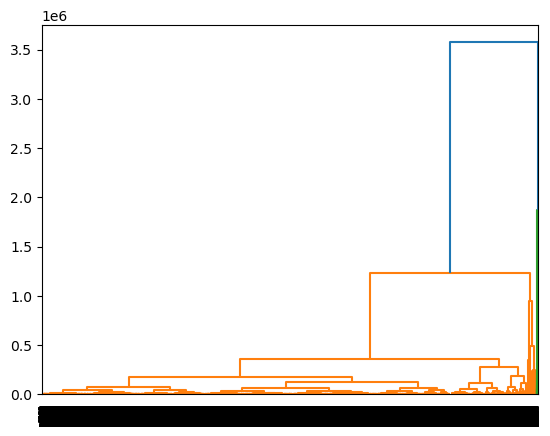

In [20]:
clustering = linkage(df_clust, method="average", metric="euclidean")
dendrogram(clustering)
cluster_labels = cut_tree(clustering, n_clusters=26).reshape(-1, )
df_clust["Cluster"] = cluster_labels

<Axes: xlabel='Cluster', ylabel='Price'>

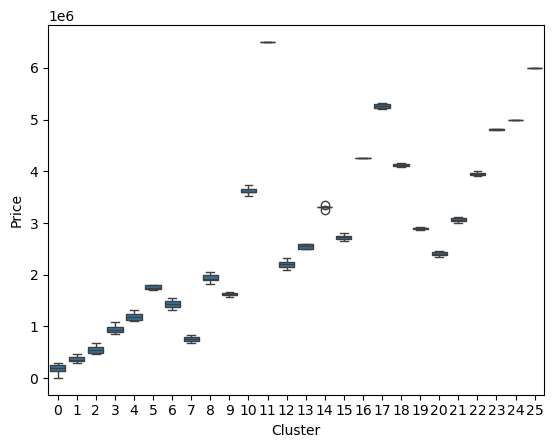

In [21]:
sns.boxplot(x="Cluster", y="Price", data=df_clust)

In [22]:
df["Cluster"] = df_clust["Cluster"]

In [23]:
df

,County,Latitude,Longitude,Price,Cluster
0,Cork,51.911373,-8.442231,160000.0,0
1,Cork,51.901490,-8.463452,180000.0,0
2,Cork,51.895019,-8.475927,120000.0,0
3,Cork,51.886775,-8.427577,320000.0,1
4,Cork,51.892899,-8.478891,80000.0,0
...,...,...,...,...,...
26692,Westmeath,53.395653,-7.727967,182000.0,0
26693,Cork,51.894093,-8.476013,215000.0,0
26694,Dublin,53.418212,-6.146101,385000.0,1
26695,Westmeath,53.530947,-7.353680,208000.0,0


In [25]:
#output for what clusters are associated with which localities
cluster_dict = df.groupby("Cluster")["County"].unique().to_dict()
for cluster, d_list in cluster_dict.items():
    print(f"Cluster {cluster} is in: {', '.join(d_list)}")

Cluster 0 is in: Cork, Sligo, Limerick, Kerry, Tipperary, Galway, Mayo, Laois, Longford, Donegal, Kildare, Waterford, Wexford, Leitrim, Dublin, Meath, Westmeath, Cavan, Clare, Wicklow, Roscommon, Kilkenny, Carlow, Louth, Offaly, Monaghan
Cluster 1 is in: Cork, Dublin, Wexford, Galway, Kerry, Meath, Donegal, Longford, Monaghan, Kildare, Wicklow, Louth, Kilkenny, Carlow, Westmeath, Cavan, Clare, Limerick, Tipperary, Sligo, Waterford, Mayo, Laois, Offaly, Roscommon, Leitrim
Cluster 2 is in: Kerry, Dublin, Cork, Westmeath, Roscommon, Clare, Galway, Wicklow, Kildare, Meath, Louth, Waterford, Donegal, Offaly, Wexford, Limerick, Cavan, Monaghan, Leitrim, Kilkenny, Laois, Carlow, Mayo, Tipperary, Sligo, Longford
Cluster 3 is in: Dublin, Clare, Meath, Cork, Wicklow, Kildare, Sligo, Laois, Galway, Limerick, Kilkenny, Wexford, Waterford, Mayo, Offaly, Donegal
Cluster 4 is in: Dublin, Cork, Carlow, Wicklow, Louth, Meath, Kildare, Westmeath, Kerry, Waterford, Galway, Wexford, Kilkenny, Tipperary, M

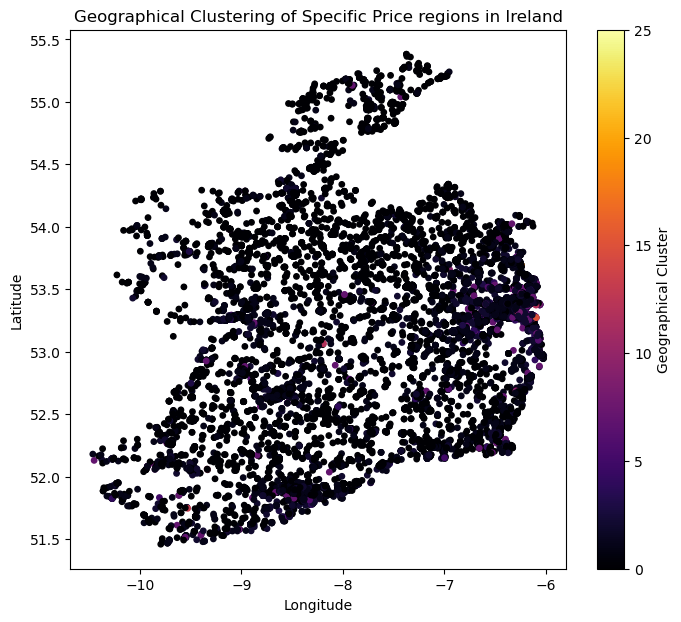

In [27]:
#national clusters
plt.figure(figsize=(8, 7))
plt.scatter(df["Longitude"], df["Latitude"], c=df["Cluster"], cmap="inferno", s=15)
plt.colorbar().set_label("Geographical Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Clustering of Specific Price regions in Ireland")
plt.grid(False)
plt.show()